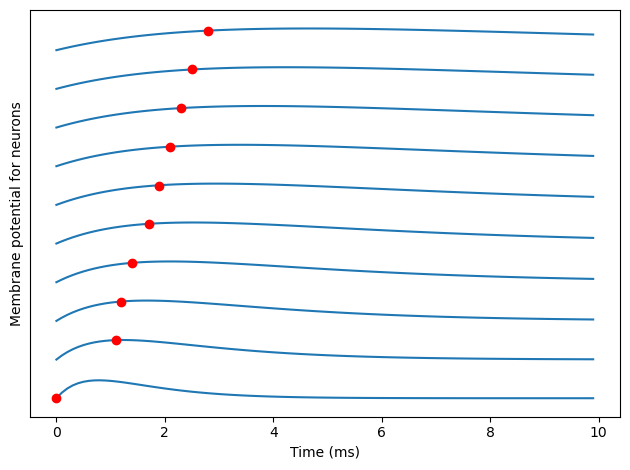

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# simulator of 𝑁 neurons using biexponential synapses model, each of which receives
# a single input spike train at time 0, but with potentially different values of 𝜏
# and 𝜏𝑥 for each neuron. Tune the parameters so that each neuron fires a single output
# spike with a different delay

def simulate_biexponential_network(num_neurons, tau, taux, duration=10, dt=0.1):
    def f(z, a, tau, taux):
      v, x = z
      return np.array([(a*x-v)/tau, -x/taux], dtype=float)

    threshold = 0.5

    # state variables
    v = np.zeros(num_neurons)
    x = np.ones(num_neurons)
    # record activity
    num_time_steps = int(duration/dt)
    v_rec = np.zeros((num_neurons, num_time_steps))
    spike_time = np.zeros(num_neurons) # they will only fire one spike each

    # simulate
    for i in range(num_neurons):
      z = np.array([v[i], x[i]], dtype=float)
      for j, t in enumerate(range(num_time_steps)):
        v_rec[i, j] = z[0]
        if z[0] > threshold and spike_time[i] == 0:
          spike_time[i] = t/10
        derivatives = f(z, 1, tau[i], taux[i])
        z += dt * derivatives

    return v_rec, spike_time

taux = np.linspace(1, 8, 10)
tau = np.linspace(0.7, 3, 10)
v, spike_times = simulate_biexponential_network(len(taux), tau, taux)
T = np.arange(v.shape[1])*0.1
for i in range(len(taux)):
    plt.plot(T, i+v[i, :], '-C0')
    plt.plot(spike_times[i], i+v[i, int(spike_times[i]/0.1)], 'or')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential for neurons')
plt.yticks([])
plt.tight_layout();